In [24]:
%load_ext autoreload
%autoreload 2
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

from networks import Bayesian_Net, ELBO
from trainer import train
from measures import accuracy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Training on MNIST

In [25]:
batch_size = 500

tranform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data/MNIST', train=True, download=True,
    transform=tranform), batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data/MNIST', train=False, download=True,
    transform=tranform), batch_size=batch_size, shuffle=True)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

epochs = 20
model = Bayesian_Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lossfun = ELBO(model, len(train_loader.dataset), 'classification').to(device)
out_valid, state_dict, train_history, valid_history = train(epochs, model,
            train_loader, valid_loader, [accuracy], device, lossfun, optimizer, scheduler = None, history = True)

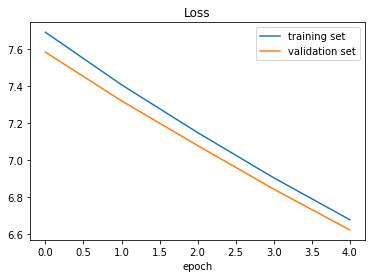

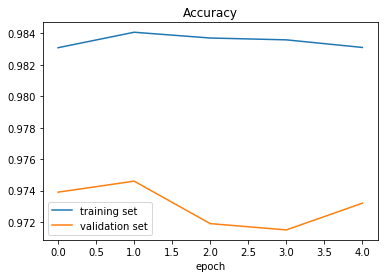

In [48]:
from matplotlib import pyplot as plt

ax = plt.Figure()
plt.plot(train_history['epoch'],train_history['loss'])
plt.plot(valid_history['epoch'],valid_history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'])
plt.show()

plt.plot(train_history['epoch'],train_history['accuracy'])
plt.plot(valid_history['epoch'],valid_history['accuracy'])
plt.legend(['training set','validation set'])
plt.xlabel('epoch')
plt.title('Accuracy')
plt.show()